In [2]:
import pandas as pd
import numpy as np

### Loading the Data

In [3]:
path = 'C:/Users/Ajmal Husain/Desktop/learning/cof_sales.csv'
cof_sales = pd.read_csv(path)
cof_sales

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


## Exploratory Data Analysis


In [4]:
cof_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


The info() function displayed important information about the dataset, showing that it contains 1133 rows and 6 columns. It also indicated the amount of memory used by the dataframe.


#### Checking Null Values

In [5]:
cof_sales.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

1. There are 89 missing values in the card column. 
2. We can fill that column with the value 'cash' using the fillna() function.

In [6]:
cof_sales['card'].fillna('cash', inplace=True)

In [7]:
cof_sales.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

#####  Converting the `date` and `datetime` columns to a `datetime` format       using `pandas.to_datetime()` function.

In [8]:
cof_sales['date'] = pd.to_datetime(cof_sales['date'])
cof_sales['datetime'] = pd.to_datetime(cof_sales['datetime'])

In [9]:
cof_sales.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [10]:
# Check for duplicates
duplicates = cof_sales.duplicated().sum()
print(f"Total duplicates: {duplicates}")

Total duplicates: 0


### Descriptive Statistics 

In [11]:
round(cof_sales['money'].describe(), 3)

count    1133.000
mean       33.106
std         5.035
min        18.120
25%        28.900
50%        32.820
75%        37.720
max        40.000
Name: money, dtype: float64

* There are 1133 data points.
* The average amount of money spent is 33.106.
* The smallest amount spent is 28.90 while the largest is 40.

In [12]:
import matplotlib.pyplot as plt

#### Checking Outliers 

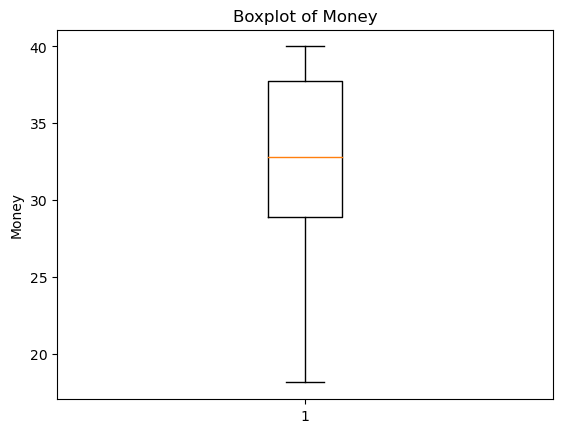

In [13]:
plt.boxplot(cof_sales['money'])
plt.title("Boxplot of Money")
plt.ylabel('Money')
plt.show()

* There are no outliers in the dataset.

In [14]:
cof_sales['day'] = cof_sales['datetime'].dt.day
cof_sales['day_of_week'] = cof_sales['datetime'].dt.day_of_week
cof_sales['month'] = cof_sales['datetime'].dt.month
cof_sales['year'] = cof_sales['datetime'].dt.year

###  Sales Trends Over Time

In [15]:
import seaborn as sns

#####  Hourly Sales

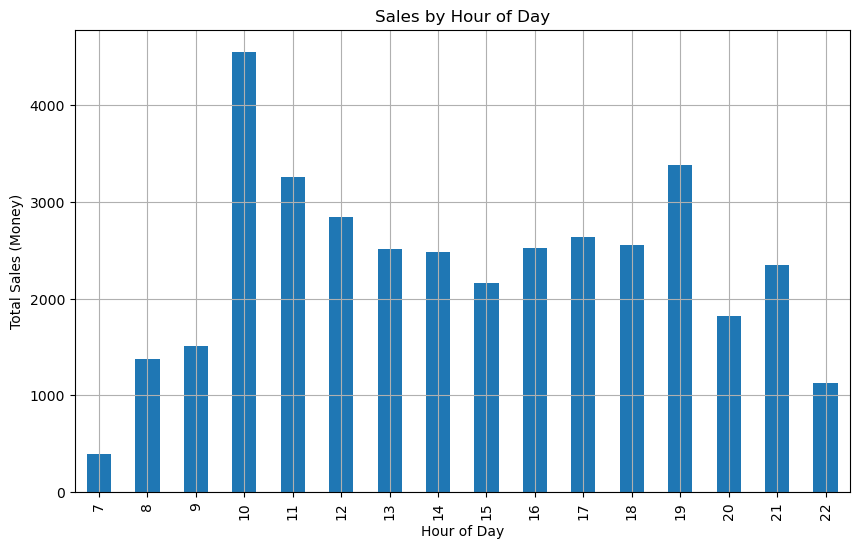

In [16]:
cof_sales['hour'] =  cof_sales['datetime'].dt.hour
hourly_sales = cof_sales.groupby('hour')['money'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales (Money)')
plt.grid(True)
plt.show()


* The coffee sales demonstrate a distinct pattern throughout the day. They commence at 7 AM, gradually increasing until reaching a peak at 10 AM, likely due to morning coffee breaks. Following this initial surge, sales decline steadily until around 4 PM, after which they stabilize until 6 PM. Notably, there is another surge in sales at 7 PM, possibly reflecting the demand from evening commuters or those unwinding after work. However, after 11 PM, customer activity diminishes significantly, resulting in no further sales.

##### Daily Sales

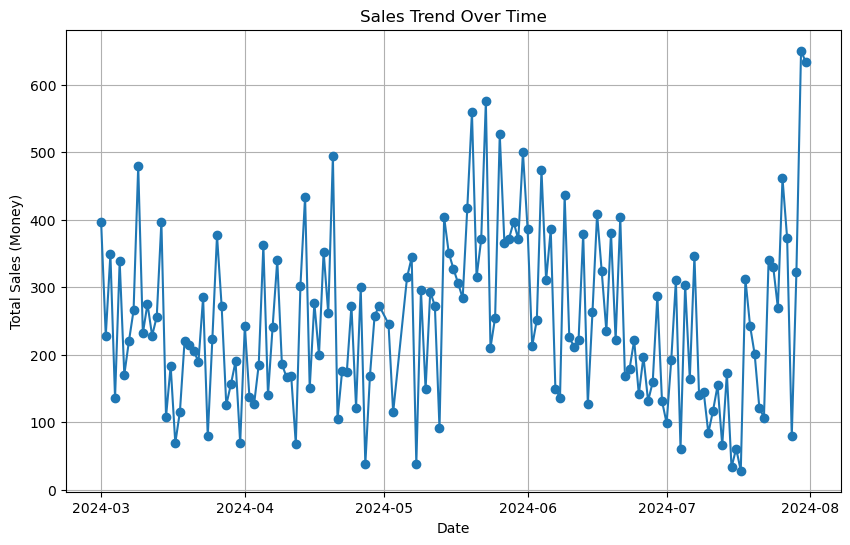

In [17]:
daily_sales = cof_sales.groupby('date')['money'].sum()
plt.figure(figsize=(10,6))
plt.plot(daily_sales, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (Money)')
plt.grid(True)
plt.show()


In [18]:
day_sales = cof_sales.groupby(['month','day'])['money'].sum().reset_index()
day_sales.columns = ['Month', 'Day', 'Total Sales']
day_sales

,Month,Day,Total Sales
0,3,1,396.30
1,3,2,228.10
2,3,3,349.10
3,3,4,135.20
4,3,5,338.50
...,...,...,...
145,7,27,372.76
146,7,28,78.86
147,7,29,321.82
148,7,30,650.48


* Daily sales exhibit significant fluctuations, with some days experiencing high sales while others show considerably lower figures. These variations may be attributed to several factors, including holidays, weather conditions, and promotional or business events. For instance, holidays often lead to increased consumer demand, while adverse weather conditions might deter customers from making purchases. Additionally, special promotions or events can significantly boost sales on particular days. Understanding these influencing factors can help in forecasting demand and optimizing inventory management.

##### Weekly Sales

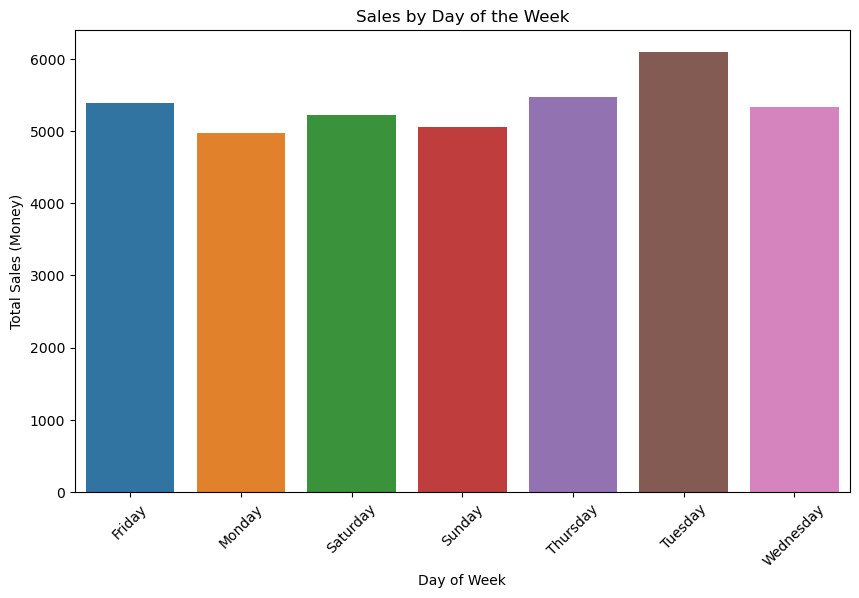

In [19]:
cof_sales['day_of_week'] = cof_sales['datetime'].dt.day_name()
weekly_sales = cof_sales.groupby('day_of_week')['money'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=45)
plt.show()

In [20]:
cof_sales['day_of_week'] = cof_sales['datetime'].dt.day_name()
week_sales = cof_sales.groupby(['day_of_week'])['money'].sum().reset_index()
week_sales.columns = ['DayofWeek', 'Total Sales']
week_sales

,DayofWeek,Total Sales
0,Friday,5386.32
1,Monday,4969.68
2,Saturday,5216.26
3,Sunday,5050.20
4,Thursday,5466.74
5,Tuesday,6092.48
6,Wednesday,5327.20


* The sales data indicates that Tuesday has the highest total sales, while Monday and Sunday have the lowest sales. Sales remain consistent mid-week (Wednesday to Friday), reflecting a steady customer base.

##### Monthly Sales

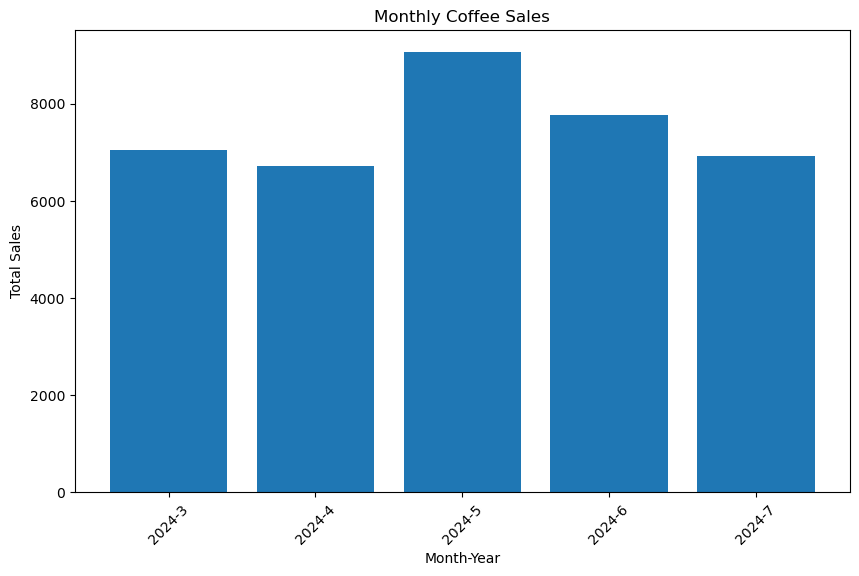

In [21]:
monthly_sales = cof_sales.groupby(['month', 'year'])['money'].sum().reset_index()
monthly_sales.columns = ['Year', 'Month', 'Total Sales']
plt.figure(figsize=(10,6))
plt.bar(monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str), monthly_sales['Total Sales'])
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Coffee Sales')
plt.xticks(rotation=45)
plt.show()

In [22]:
cof_sales['month'] = cof_sales['datetime'].dt.month_name()
month_sales = cof_sales.groupby(['month'])['money'].sum().reset_index()
month_sales.columns = ['month', 'Total Sales']
month_sales

,month,Total Sales
0,April,6720.56
1,July,6915.94
2,June,7758.76
3,March,7050.20
4,May,9063.42


* The sales data shows that May has the highest sales at, followed by June. As the weather warms up, more people are likely to enjoy coffee, boosting sales. July also remains strong at, while March and April show solid sales figures. Businesses can capitalize on these trends by promoting coffee during these peak months to meet customer demand.

##### Hourly Sales Plot for each Coffee

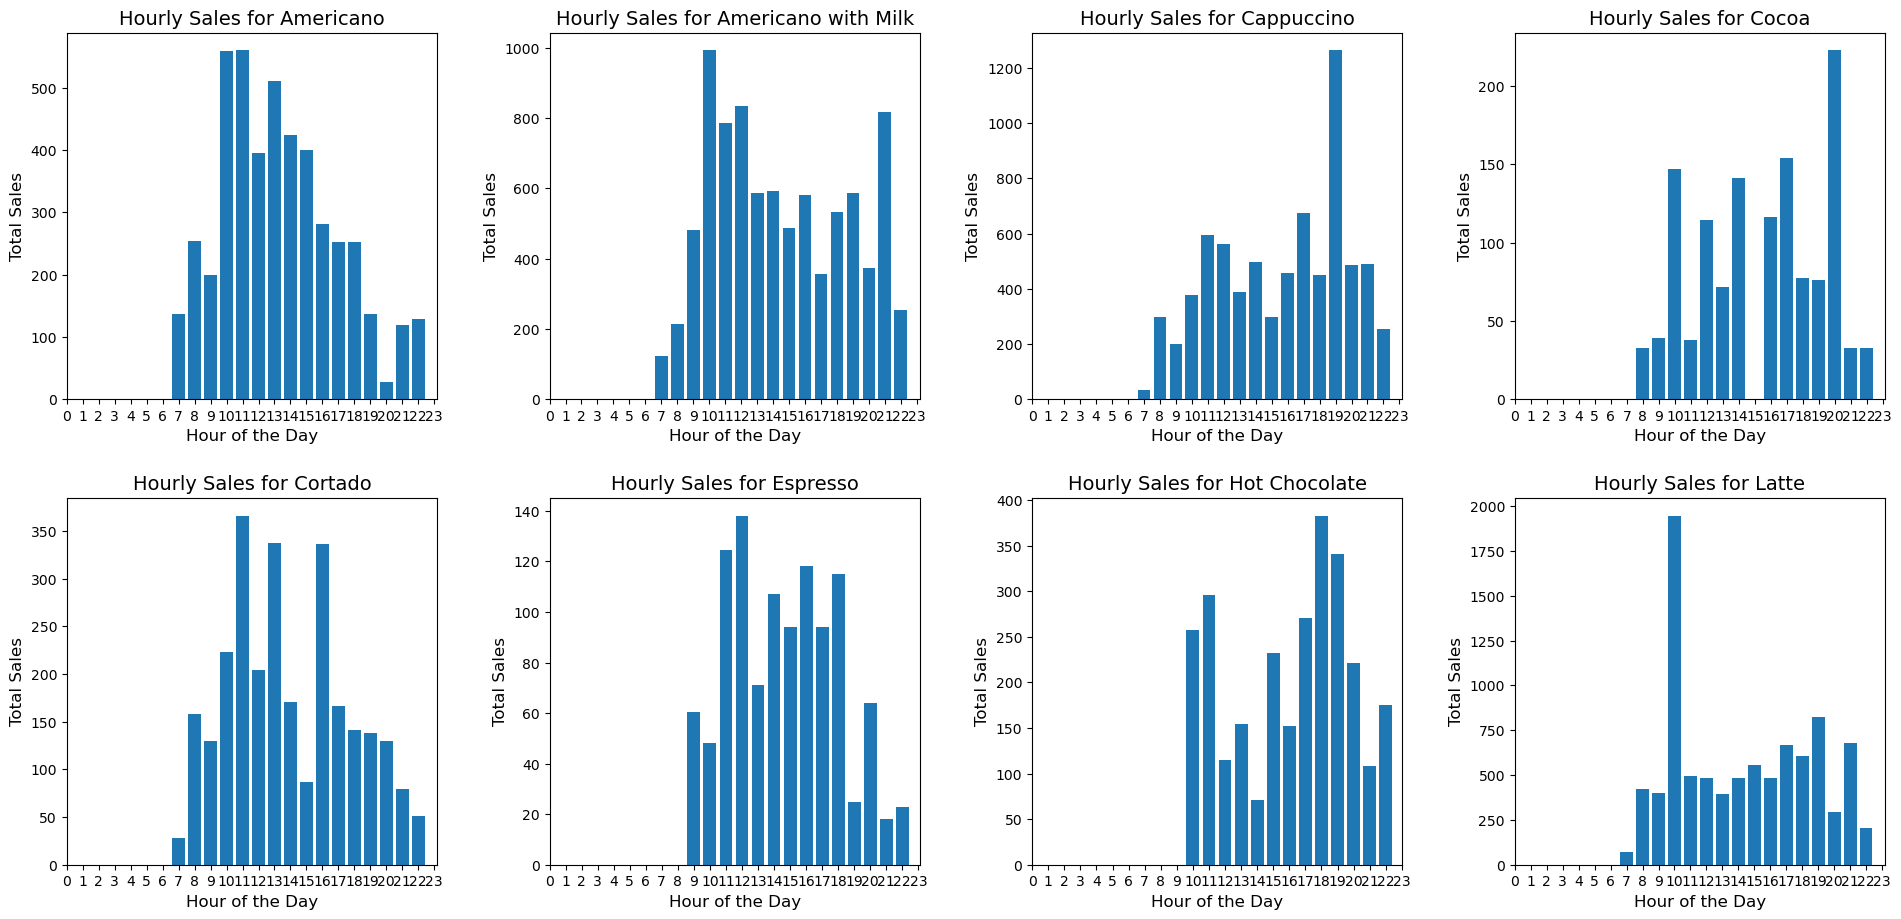

In [36]:
hourly_sales = cof_sales.groupby(['coffee_name', 'hour'])['money'].sum().unstack()

fig, axs = plt.subplots(2, 4, figsize=(20, 10)) 
fig.tight_layout(pad=5) 

axs = axs.flatten()

for i, coffee in enumerate(hourly_sales.index):
    axs[i].bar(hourly_sales.columns, hourly_sales.loc[coffee])  
    axs[i].set_title(f'Hourly Sales for {coffee}', fontsize=14)
    axs[i].set_xlabel('Hour of the Day', fontsize=12)
    axs[i].set_ylabel('Total Sales', fontsize=12)
    axs[i].set_xticks(range(24))  
    
plt.show()  
 

* The plot reveals distinct peak times for different types of coffee throughout the day. Americano, Americano with Milk, and Espresso experience their highest sales during the morning hours, likely catering to customers seeking a quick energy boost to start their day. On the other hand, Latte, Hot Chocolate, and Cocoa see a surge in sales in the evening.

#### Product Popularity

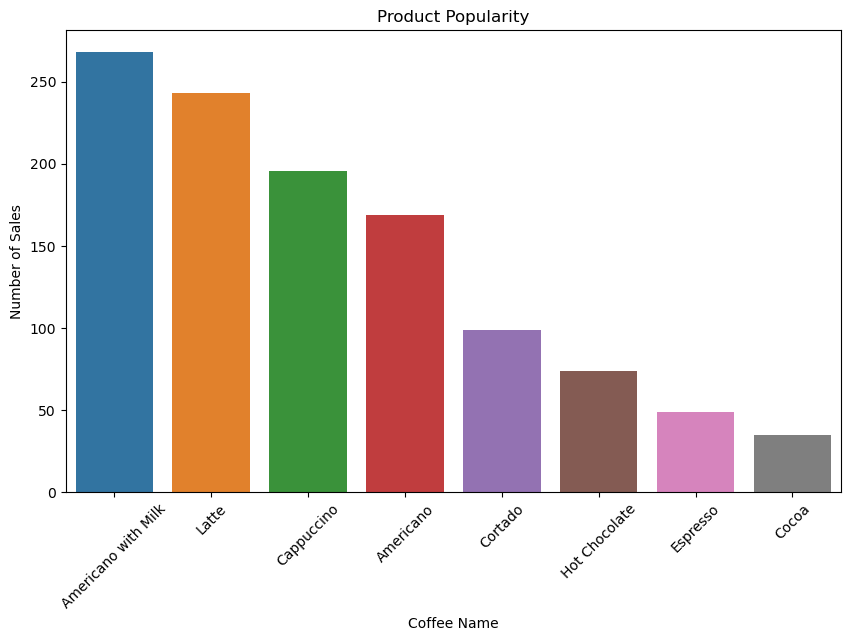

In [37]:
product_sales = cof_sales['coffee_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Product Popularity')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

* Americano with milk is the most popular choice among customers, followed by Latte and Cappuccino. In contrast, Espresso and Cocoa are less preferred options. 